In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
#import contractions
import re
import random
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
additional  = ['rt','rts','retweet'] # lista adicional de stopwords
swords = set().union(stopwords.words('english'),additional) # adicionando palavras para o stopwords

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('dataSentimento.csv')
df

,Unnamed: 0,date,text,cleantext,Sentimento
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00
...,...,...,...,...,...
1716967,1489530,2021-10-19,$klee listing on @WhiteBit TODAY with 60.000+ ...,"['klee', 'listing', 'today', 'daily', 'traders...",0.00
1716968,1489531,2021-10-19,$BTC seeing an uptick in chatter on twitch ove...,NaN,NaN
1716969,Via https://t.co/p6iec02QvX,NaN,NaN,NaN,NaN
1716970,#btc #twitch https://t.co/kn88Mhogyt,"['btc', 'seeing', 'uptick', 'chatter', 'twitch...",0.0,NaN,NaN


In [3]:
df = df[df['Sentimento'].notna()]
df

,Unnamed: 0,date,text,cleantext,Sentimento
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00
...,...,...,...,...,...
1716964,1489527,2021-10-19,.....@lifeisdefi I thought you had been quiet ...,"['thought', 'quiet', 'social', 'media', 'know'...",0.00
1716965,1489528,2021-10-19,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...,"['scan', 'results', 'pair', 'exchange', 'top',...",0.00
1716966,1489529,2021-10-19,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...,"['scan', 'results', 'exchange', 'top', 'bullis...",0.00
1716967,1489530,2021-10-19,$klee listing on @WhiteBit TODAY with 60.000+ ...,"['klee', 'listing', 'today', 'daily', 'traders...",0.00


In [4]:
indexes2Drop = df[df['date'].str.contains('bitcoin|Bitcoin|ETH|btc|BTC')].index
df.drop(indexes2Drop, inplace = True)
df['date'] = pd.to_datetime(df['date']).dt.date

<AxesSubplot:xlabel='date'>

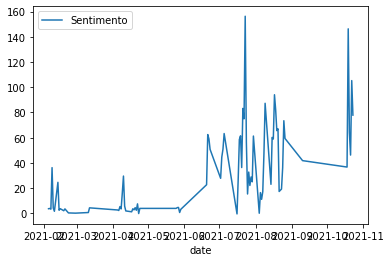

In [5]:
#pd.DatetimeIndex(df['date']).normalize()
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().sort_values()
#df.groupby(pd.DatetimeIndex(df['date']).normalize())['Sentimento'].sum().plot(legend=True)
df.groupby(df['date'])['Sentimento'].sum().plot(legend=True)


In [6]:
# twFrame[(twFrame["Sentimento"].sort_values() > 0.2) | (twFrame["Sentimento"].sort_values() < -0.2) ]
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum()
g = df.groupby(pd.DatetimeIndex(df['date']).normalize()).sum()
g.reset_index(inplace = True)
g['Sentimento Norm'] = (g['Sentimento'] - g['Sentimento'].min())/(g['Sentimento'].max() - g['Sentimento'].min())
g

,date,Sentimento,Sentimento Norm
0,2021-02-05,3.65,0.03
1,2021-02-06,3.85,0.03
2,2021-02-07,3.29,0.02
3,2021-02-08,36.23,0.23
4,2021-02-09,4.23,0.03
...,...,...,...
79,2021-10-19,146.35,0.94
80,2021-10-20,64.18,0.41
81,2021-10-21,46.21,0.30
82,2021-10-22,105.29,0.67


In [7]:
minmaxpoints = g[ (g['Sentimento'] >= 0.75) | (g['Sentimento'] <= 0.2) ]
minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minmaxpoints

,date,Sentimento,Sentimento Norm
0,2021-02-05,3.65,0.03
1,2021-02-06,3.85,0.03
2,2021-02-07,3.29,0.02
3,2021-02-08,36.23,0.23
4,2021-02-09,4.23,0.03
...,...,...,...
79,2021-10-19,146.35,0.94
80,2021-10-20,64.18,0.41
81,2021-10-21,46.21,0.30
82,2021-10-22,105.29,0.67


In [8]:
category = ['Negativo','Neutro','Positivo']
df['DSent'] = pd.cut(df['Sentimento'], bins=[-1,-0.5,0.5,1], labels=category)
df

,Unnamed: 0,date,text,cleantext,Sentimento,DSent
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00,Neutro
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00,Neutro
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00,Neutro
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00,Neutro
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00,Neutro
...,...,...,...,...,...,...
1716964,1489527,2021-10-19,.....@lifeisdefi I thought you had been quiet ...,"['thought', 'quiet', 'social', 'media', 'know'...",0.00,Neutro
1716965,1489528,2021-10-19,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...,"['scan', 'results', 'pair', 'exchange', 'top',...",0.00,Neutro
1716966,1489529,2021-10-19,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...,"['scan', 'results', 'exchange', 'top', 'bullis...",0.00,Neutro
1716967,1489530,2021-10-19,$klee listing on @WhiteBit TODAY with 60.000+ ...,"['klee', 'listing', 'today', 'daily', 'traders...",0.00,Neutro


In [9]:
# from sklearn.preprocessing import OneHotEncoder

# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(df[['Dis_Sentimento']])
# pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
# df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
# df

df1 = pd.get_dummies(df,columns=['DSent'])
df1

,Unnamed: 0,date,text,cleantext,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00,0,1,0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00,0,1,0
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00,0,1,0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00,0,1,0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00,0,1,0
...,...,...,...,...,...,...,...,...
1716964,1489527,2021-10-19,.....@lifeisdefi I thought you had been quiet ...,"['thought', 'quiet', 'social', 'media', 'know'...",0.00,0,1,0
1716965,1489528,2021-10-19,[SCAN RESULTS - 15m - #BTC PAIR]\n\nExchange: ...,"['scan', 'results', 'pair', 'exchange', 'top',...",0.00,0,1,0
1716966,1489529,2021-10-19,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...,"['scan', 'results', 'exchange', 'top', 'bullis...",0.00,0,1,0
1716967,1489530,2021-10-19,$klee listing on @WhiteBit TODAY with 60.000+ ...,"['klee', 'listing', 'today', 'daily', 'traders...",0.00,0,1,0


<AxesSubplot:xlabel='date'>

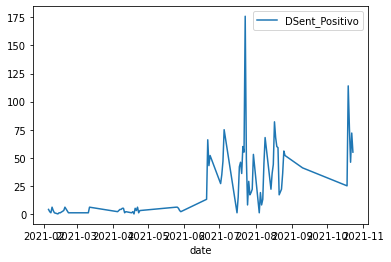

In [10]:
# df[('Positivo',)]
df1.groupby(df1['date'])['DSent_Positivo'].sum().plot(legend=True)

In [11]:
datapositivo = df1.groupby(pd.DatetimeIndex(df1['date'])).sum()
datapositivo.reset_index(inplace = True)
datapositivo

,date,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,2021-02-05,3.65,0.00,"1,690.00",4.00
1,2021-02-06,3.85,0.00,"3,276.00",2.00
2,2021-02-07,3.29,0.00,"3,029.00",1.00
3,2021-02-08,36.23,1.00,"5,640.00",6.00
4,2021-02-09,4.23,0.00,"4,347.00",3.00
...,...,...,...,...,...
79,2021-10-19,146.35,18.00,"63,459.00",114.00
80,2021-10-20,64.18,7.00,"33,279.00",77.00
81,2021-10-21,46.21,27.00,"42,301.00",46.00
82,2021-10-22,105.29,9.00,"54,671.00",72.00


In [12]:
maxpoints = datapositivo[ (datapositivo['DSent_Positivo'] >= 50) ]
maxpoints['date'] = pd.to_datetime(maxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
maxpoints

,date,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
37,2021-06-21,62.47,38.00,"41,625.00",66.00
39,2021-06-23,50.72,14.00,"29,292.00",52.00
43,2021-07-05,63.29,6.00,"25,900.00",75.00
49,2021-07-21,83.22,14.00,"38,837.00",60.00
50,2021-07-22,74.95,7.00,"30,771.00",55.00
51,2021-07-23,156.34,14.00,"43,345.00",176.00
58,2021-07-30,61.30,11.00,"38,328.00",53.00
64,2021-08-09,87.29,20.00,"53,413.00",68.00
68,2021-08-17,94.07,8.00,"35,228.00",82.00
69,2021-08-18,82.28,14.00,"38,145.00",68.00


In [13]:
maxpoints['date'] = maxpoints['date'].astype(str)
maxpointsList = list(maxpoints['date'])#ERROR: Command errored out with exit status 1:
maxpointsList

['2021-06-21',
 '2021-06-23',
 '2021-07-05',
 '2021-07-21',
 '2021-07-22',
 '2021-07-23',
 '2021-07-30',
 '2021-08-09',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-25',
 '2021-08-26',
 '2021-10-19',
 '2021-10-20',
 '2021-10-22',
 '2021-10-23']

In [14]:
btcPrice = pd.read_csv('Data/BTC-USD_otc272020_oct272021.csv')
# btcPrice[btcPrice['Date'] == '2021-02-08']


In [15]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
zz = btcPrice.query('Date in @maxpointsList')
btcPrice.loc[zz.index,'Positivo'] = True
btcPrice['Positivo'] = btcPrice['Positivo'].replace(np.nan,False)
btcPrice['Date']

0      2020-10-28
1      2020-10-29
2      2020-10-30
3      2020-10-31
4      2020-11-01
          ...    
361    2021-10-24
362    2021-10-25
363    2021-10-26
364    2021-10-27
365    2021-10-28
Name: Date, Length: 366, dtype: object

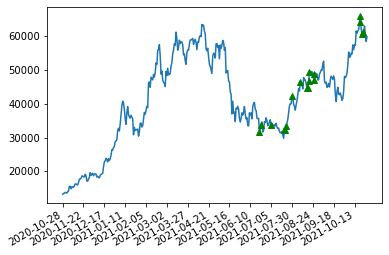

In [49]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Positivo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(btcPrice['Date'], ts) 
plt.xticks(x[::25])
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
plt.savefig('Positivo.png')

<AxesSubplot:xlabel='date'>

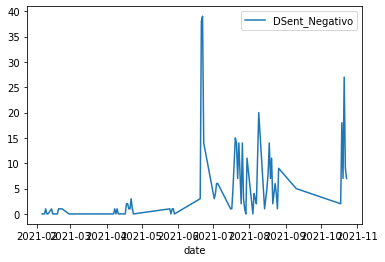

In [17]:
df1.groupby(df1['date'])['DSent_Negativo'].sum().plot(legend=True)

In [18]:
minpoints = datapositivo[ (datapositivo['DSent_Negativo'] >= 15) ]
minpoints['date'] = pd.to_datetime(minpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minpoints

,date,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
37,2021-06-21,62.47,38.00,"41,625.00",66.00
38,2021-06-22,59.03,39.00,"45,758.00",43.00
48,2021-07-20,36.31,15.00,"30,882.00",36.00
64,2021-08-09,87.29,20.00,"53,413.00",68.00
79,2021-10-19,146.35,18.00,"63,459.00",114.00
81,2021-10-21,46.21,27.00,"42,301.00",46.00


In [19]:
minpoints['date'] = minpoints['date'].astype(str)
minpointsList = list(minpoints['date'])
minpointsList

['2021-06-21',
 '2021-06-22',
 '2021-07-20',
 '2021-08-09',
 '2021-10-19',
 '2021-10-21']

In [20]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
bticMin = btcPrice.query('Date in @minpointsList')
btcPrice.loc[bticMin.index,'Negativo'] = True
btcPrice['Negativo'] = btcPrice['Negativo'].replace(np.nan,False)
btcPrice['Date']

0      2020-10-28
1      2020-10-29
2      2020-10-30
3      2020-10-31
4      2020-11-01
          ...    
361    2021-10-24
362    2021-10-25
363    2021-10-26
364    2021-10-27
365    2021-10-28
Name: Date, Length: 366, dtype: object

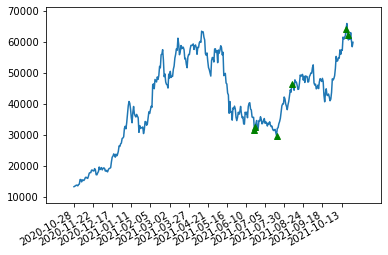

In [48]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Negativo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(x, ts)
plt.xticks(x[::25])
# plt.yticks(ts[::70])
plt.margins(0.1)
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
# plt.savefig('teste.png')

0      2020-10-28
2      2020-10-30
4      2020-11-01
6      2020-11-03
8      2020-11-05
          ...    
356    2021-10-19
358    2021-10-21
360    2021-10-23
362    2021-10-25
364    2021-10-27
Name: Date, Length: 183, dtype: object